interactive(children=(FloatSlider(value=0.0, description='theta', max=6.283185307179586, min=-3.14159265358979…

<function __main__.red_dot(theta)>

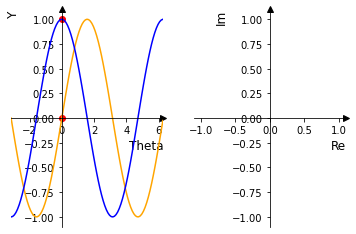

In [37]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import numpy as np
import math

def create_axis(ax): # Creates centred axis at 0,0
    ax.spines['left'].set_position('zero') # Centre axis
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False) # Add arrows to axis
    ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
    return ax

def sin_cos_diagram(ax):
    ax = create_axis(ax)
    #ax.set_yticklabels([-1, 0, +1], [r'$-1$', r'$0$', r'$+1$']) # Remove numbers from axis
    #ax.set_xticklabels([-np.pi, -np.pi/2, 0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$', r"$+{3}\pi/2$", r"$+{2}\pi$"])
    ax.axis([-np.pi, 2*np.pi, -1.1, 1.1]) # Set axis range
    plt.ylabel('Y', loc='top', fontsize=12) # Label axis
    plt.xlabel('Theta', loc='right', fontsize=12)

    xs = np.arange(-np.pi,2*np.pi,0.1)
    sinx = np.sin(xs)
    cosx = np.cos(xs)
    ax.plot(xs, sinx, color='orange')
    ax.plot(xs, cosx, color='blue')
    return ax

def argand_diagram(ax):
    ax = create_axis(ax)
    ax.axis([-1.1, 1.1, -1.1, 1.1])
    plt.ylabel('Im', loc='top', fontsize=12) # Label axis
    plt.xlabel('Re', loc='right', fontsize=12)

def annotation(sinx, cosx):
    if sinx < 0:
        print('Sin value negative, down on real axis')
    elif sinx > 0:
        print('Sin value positive, up on real axis')
    elif sinx == 0:
        print('Sin value is 0, on real axis')

    if cosx < 0:
        print('Cos value negative, left on imaginary axis')
    elif cosx > 0:
        print('Cos value positive, right on imaginary axis')
    elif cosx == 0:
        print('Cos value is 0, on imaginary axis')

def red_dot(theta):
    trig_diagram = plt.subplot(1,2,1)
    trig_diagram = sin_cos_diagram(trig_diagram)
    sin_theta = np.sin(theta)
    cos_theta = np.cos(theta)
    trig_diagram.scatter(theta, sin_theta, color='red')
    trig_diagram.scatter(theta, cos_theta, color='red')

    arg_diagram = plt.subplot(1, 2, 2)
    arg_diagram = argand_diagram(arg_diagram)
    arg_diagram.scatter(cos_theta, sin_theta)
    '''
    arg_diagram.plot([0,cos_theta], [0,sin_theta], 'bo-')


    x_vals = [0, cos_theta]
    y_vals = [0, sin_theta]
    dot_vals1 = [cos_theta,cos_theta]
    dot_vals2 = [sin_theta,sin_theta]

    arg_diagram.plot(dot_vals1, y_vals, '--', color='orange')
    arg_diagram.plot(x_vals, dot_vals2, '--', color='blue')
    '''

    return plt.show()

interact(red_dot, theta=widgets.FloatSlider(min=-np.pi, max=2*np.pi, step=0.1, value=0))